# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 7</span>

### Exercise 07.1

Use the Monte Carlo NVT code we have provided to print out instantaneous values (ogni volta che chiamo move) of potential energy per particle, $U/N$, and pressure, $P$, along **equilibrated** Monte Carlo simulations (of  $M=10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

## Liquid phase

In [3]:

U=np.loadtxt("RisultatiNotebook/LJUnits/Liquido/Risultati/IstantV.dat", usecols=(0), unpack='true')
P=np.loadtxt("RisultatiNotebook/LJUnits/Liquido/Risultati/IstantP.dat", usecols=(0), unpack='true')
#Studio la correlazione delle pei primi Mx
Mx=10000
Ux=np.zeros(Mx)
Px=np.zeros(Mx)
for i in range(Mx):
    Ux[i]=U[i]
    Px[i]=P[i]

M=U.size
print("Dati importati")

Dati importati


In [3]:
chiU=np.zeros(Mx) #Inizializzo la chi
chiP=np.zeros(Mx) # idem
sigma2U=0.
sigma2P=0.
#Varianza U
sum_1=0.
sum_2=0.
sum_1=np.sum(Ux)
sum_2=np.sum(Ux*Ux)
sigma2U=sum_2/Mx-((sum_1/Mx)**2)
#Varianza P
sum_1=0.
sum_2=0.
sum_1=np.sum(Px)
sum_2=np.sum(Px*Px)
sigma2P=sum_2/Mx-((sum_1/Mx)**2)

print("Varianza calcolata")

sU=np.zeros(3)
sP=np.zeros(3)
for n in range(Mx):
        if(n%400==0):
            print("Sono arrivato a n=",n)
        sU[0]=0.
        sU[1]=0.
        sU[2]=0.
        sP[0]=0.
        sP[1]=0.
        sP[2]=0.
        for i in range(Mx-n):
            sU[0]+=Ux[i]*Ux[i+n]
            sU[1]+=Ux[i]
            sU[2]+=Ux[i+n]
            sP[0]+=Px[i]*Px[i+n]
            sP[1]+=Px[i]
            sP[2]+=Px[i+n]
        chiU[n]=(sU[0]/(Mx-n)-(sU[1]*sU[2]/(Mx-n)/(Mx-n)))/(sigma2U)
        chiP[n]=(sP[0]/(Mx-n)-(sP[1]*sP[2]/(Mx-n)/(Mx-n)))/(sigma2P)
        

Varianza calcolata
Sono arrivato a n= 0
Sono arrivato a n= 400
Sono arrivato a n= 800
Sono arrivato a n= 1200
Sono arrivato a n= 1600
Sono arrivato a n= 2000
Sono arrivato a n= 2400
Sono arrivato a n= 2800
Sono arrivato a n= 3200
Sono arrivato a n= 3600
Sono arrivato a n= 4000
Sono arrivato a n= 4400
Sono arrivato a n= 4800
Sono arrivato a n= 5200
Sono arrivato a n= 5600
Sono arrivato a n= 6000
Sono arrivato a n= 6400
Sono arrivato a n= 6800
Sono arrivato a n= 7200
Sono arrivato a n= 7600
Sono arrivato a n= 8000
Sono arrivato a n= 8400
Sono arrivato a n= 8800
Sono arrivato a n= 9200
Sono arrivato a n= 9600


In [4]:
Xu=chiU
Xp=chiP

 Internal Energy:
optimized parameters [A,tau] =
[ 0.7345785  12.61675914]
parameters uncertainty =
[0.03148994 0.79539099]

 Pressure:
optimized parameters [A,tau] =
[ 0.7286208  15.77413451]
parameters uncertainty =
[0.03540899 1.11864783]


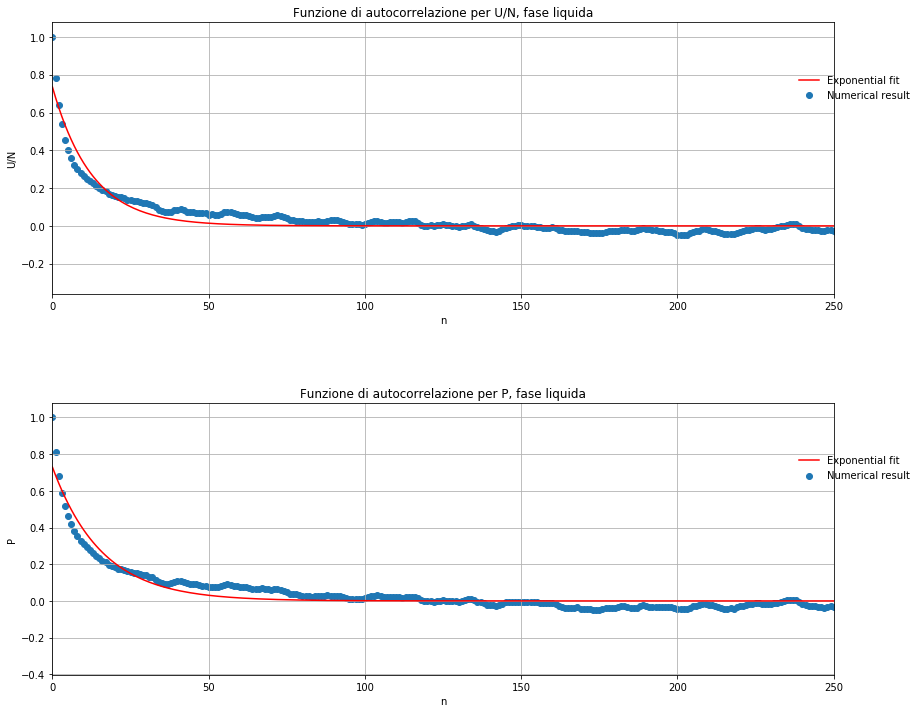

In [5]:
from scipy.optimize import curve_fit

def f(x,A,tau):  #funzione per il fit
    return A*np.exp(-(x/tau)) #esponenziale


fig = plt.figure(figsize=(14,12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
x=np.arange(Mx)
plt.subplot(2,1,1)
plt.title('Funzione di autocorrelazione per U/N, fase liquida')
plt.xlabel('n')
plt.ylabel('U/N')
plt.scatter(x,Xu, label='Numerical result')
p_opt, p_cov = curve_fit(f, x, Xu, bounds=([0,0],[100,300]))
y_fit = f(x,p_opt[0],p_opt[1])
plt.plot(x,y_fit, color='r', label="Exponential fit") # plotting fitted function
print(" Internal Energy:")
print("optimized parameters [A,tau] =")
print(p_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))
plt.grid(True)
plt.legend(loc=(0.95, 0.7), frameon=False)
plt.xlim(0,250)

                
plt.subplot(2,1,2)
plt.title('Funzione di autocorrelazione per P, fase liquida')
plt.xlabel('n')
plt.ylabel('P')
plt.scatter(x,Xp, label='Numerical result')
p_opt, p_cov = curve_fit(f, x, Xp, bounds=([0,0],[100,300]))
y_fit = f(x,p_opt[0],p_opt[1])
plt.plot(x,y_fit, color='r', label="Exponential fit") # plotting fitted function
print("\n","Pressure:")
print("optimized parameters [A,tau] =")
print(p_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))
plt.grid(True)
plt.xlim(0,250)
plt.legend(loc=(0.95, 0.7), frameon=False)
plt.show()

### Statistical uncertainty

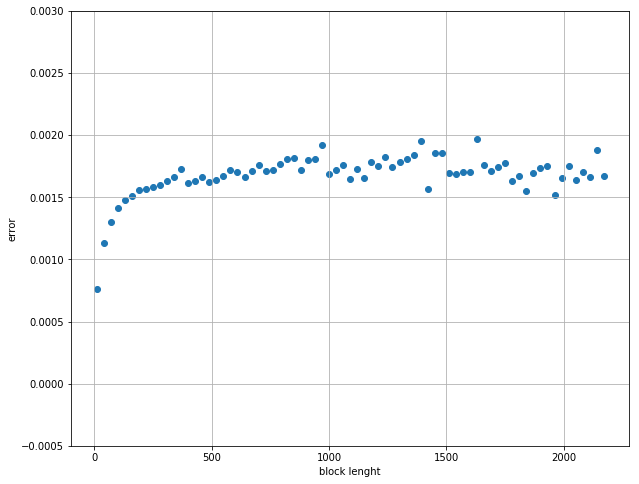

In [5]:
def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==1:
        return 0
    else:
        return math.sqrt((AV2/n - (AV/n)**2)/(n-1))
        
fig = plt.figure(figsize=(10,8))

start=10
stop=2200
st=30
p=(stop-start)/st
p=int(p)
errorp=np.zeros(p)
x=np.zeros(p)
indice=0
for L in range(start,stop,st):
    N=int(M/L) #Numero di blocchi
    ave = np.zeros(N)
    av2 = np.zeros(N)
    sum_prog=0.
    su2_prog=0. 
    for i in range(N):
        sum = 0
        for j in range(L):
            k = j+i*L
            sum += U[k]
        ave[i] = sum/L       # media di blocco
        av2[i] = (ave[i])**2 # media di blocco al quadrato
        sum_prog += ave[i]
        su2_prog +=av2[i]
    errorp[indice]=error(sum_prog,su2_prog,N)
    x[indice]=L
    indice+=1

plt.scatter(x,errorp)
plt.xlabel('block lenght')
plt.ylabel('error')
plt.ylim(-0.0005,0.003)
plt.grid(True)
plt.show()

From the last plot we can see the effect of correlation in estimating the statistical uncertainties.

## Solid phase

In [7]:
U=np.loadtxt("RisultatiNotebook/LJUnits/Solido/Risultati/IstantV.dat", usecols=(0), unpack='true')
P=np.loadtxt("RisultatiNotebook/LJUnits/Solido/Risultati/IstantP.dat", usecols=(0), unpack='true')
#Studio la correlazione delle pei primi Mx
Mx=10000
Ux=np.zeros(Mx)
Px=np.zeros(Mx)
for i in range(Mx):
    Ux[i]=U[i]
    Px[i]=P[i]

M=U.size
print("Dati importati")

Dati importati


In [8]:
chiU=np.zeros(Mx) #Inizializzo la chi
chiP=np.zeros(Mx) # idem
sigma2U=0.
sigma2P=0.
#Varianza U
sum_1=0.
sum_2=0.
sum_1=np.sum(Ux)
sum_2=np.sum(Ux*Ux)
sigma2U=sum_2/Mx-((sum_1/Mx)**2)
#Varianza P
sum_1=0.
sum_2=0.
sum_1=np.sum(Px)
sum_2=np.sum(Px*Px)
sigma2P=sum_2/Mx-((sum_1/Mx)**2)

print("Varianza calcolata")

sU=np.zeros(3)
sP=np.zeros(3)
for n in range(Mx):
        if(n%400==0):
            print("Sono arrivato a n=",n)
        sU[0]=0.
        sU[1]=0.
        sU[2]=0.
        sP[0]=0.
        sP[1]=0.
        sP[2]=0.
        for i in range(Mx-n):
            sU[0]+=Ux[i]*Ux[i+n]
            sU[1]+=Ux[i]
            sU[2]+=Ux[i+n]
            sP[0]+=Px[i]*Px[i+n]
            sP[1]+=Px[i]
            sP[2]+=Px[i+n]
        chiU[n]=(sU[0]/(Mx-n)-(sU[1]*sU[2]/(Mx-n)/(Mx-n)))/(sigma2U)
        chiP[n]=(sP[0]/(Mx-n)-(sP[1]*sP[2]/(Mx-n)/(Mx-n)))/(sigma2P)

Varianza calcolata
Sono arrivato a n= 0
Sono arrivato a n= 400
Sono arrivato a n= 800
Sono arrivato a n= 1200
Sono arrivato a n= 1600
Sono arrivato a n= 2000
Sono arrivato a n= 2400
Sono arrivato a n= 2800
Sono arrivato a n= 3200
Sono arrivato a n= 3600
Sono arrivato a n= 4000
Sono arrivato a n= 4400
Sono arrivato a n= 4800
Sono arrivato a n= 5200
Sono arrivato a n= 5600
Sono arrivato a n= 6000
Sono arrivato a n= 6400
Sono arrivato a n= 6800
Sono arrivato a n= 7200
Sono arrivato a n= 7600
Sono arrivato a n= 8000
Sono arrivato a n= 8400
Sono arrivato a n= 8800
Sono arrivato a n= 9200
Sono arrivato a n= 9600


In [9]:
Xu=chiU
Xp=chiP

optimized parameters [A,tau] =
[0.91959899 7.80781762]
parameters uncertainty =
[0.03301562 0.42207305]

 Pressure:
optimized parameters [A,tau] =
[0.92146504 7.69400256]
parameters uncertainty =
[0.03312062 0.41677618]


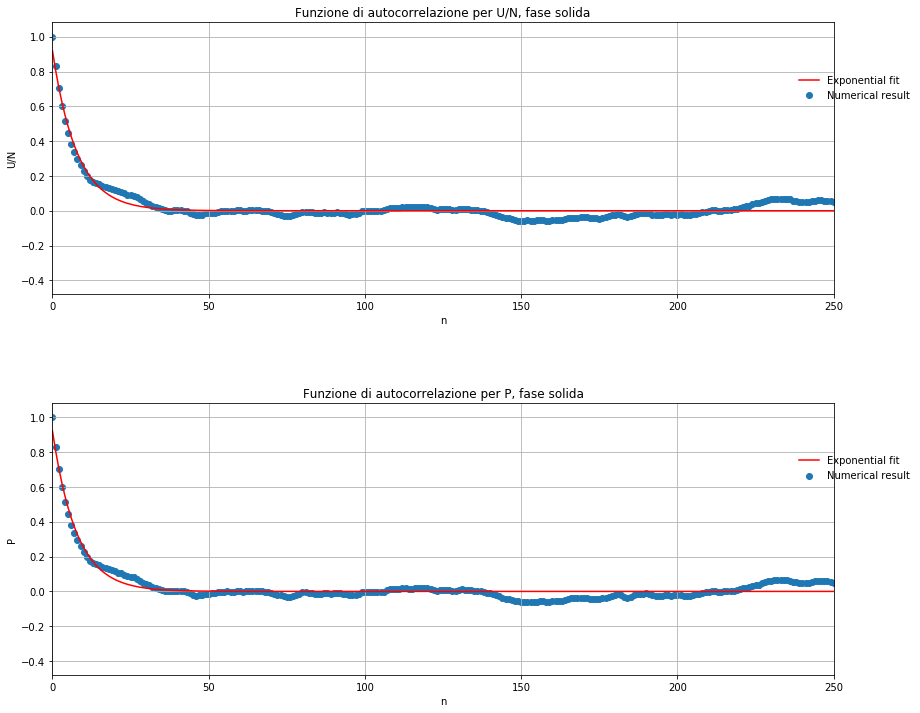

In [11]:
from scipy.optimize import curve_fit

def f(x,A,tau):  #funzione per il fit
    return A*np.exp(-(x/tau)) #esponenziale


fig = plt.figure(figsize=(14,12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
x=np.arange(Mx)
plt.subplot(2,1,1)
plt.title('Funzione di autocorrelazione per U/N, fase solida')
plt.xlabel('n')
plt.ylabel('U/N')
plt.scatter(x,Xu, label='Numerical result')
p_opt, p_cov = curve_fit(f, x, Xu, bounds=([0,0],[100,300]))
y_fit = f(x,p_opt[0],p_opt[1])
plt.plot(x,y_fit, color='r', label="Exponential fit") # plotting fitted function
print("optimized parameters [A,tau] =")
print(p_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))
plt.grid(True)
plt.legend(loc=(0.95, 0.7), frameon=False)
plt.xlim(0,250)

                  
plt.subplot(2,1,2)
plt.title('Funzione di autocorrelazione per P, fase solida')
plt.xlabel('n')
plt.ylabel('P')
plt.scatter(x,Xp, label='Numerical result')
p_opt, p_cov = curve_fit(f, x, Xp, bounds=([0,0],[100,300]))
y_fit = f(x,p_opt[0],p_opt[1])
plt.plot(x,y_fit, color='r', label="Exponential fit") # plotting fitted function
print("\n","Pressure:")
print("optimized parameters [A,tau] =")
print(p_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))
plt.legend(loc=(0.95, 0.7), frameon=False)
plt.grid(True)
plt.xlim(0,250)
plt.show()

### Statistical uncertainty

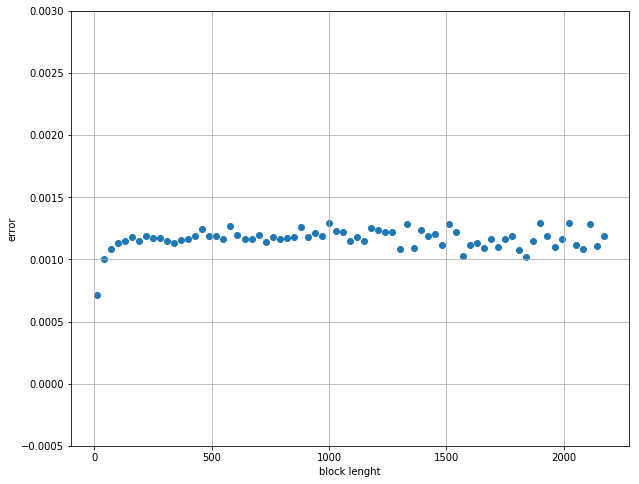

In [12]:
def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==1:
        return 0
    else:
        return math.sqrt((AV2/n - (AV/n)**2)/(n-1))
        
fig = plt.figure(figsize=(10,8))

start=10
stop=2200
st=30
p=(stop-start)/st
p=int(p)
errorp=np.zeros(p)
x=np.zeros(p)
indice=0
for L in range(start,stop,st):
    N=int(M/L) #Numero di blocchi
    ave = np.zeros(N)
    av2 = np.zeros(N)
    sum_prog=0.
    su2_prog=0. 
    for i in range(N):
        sum = 0
        for j in range(L):
            k = j+i*L
            sum += U[k]
        ave[i] = sum/L       # media di blocco
        av2[i] = (ave[i])**2 # media di blocco al quadrato
        sum_prog += ave[i]
        su2_prog +=av2[i]
    errorp[indice]=error(sum_prog,su2_prog,N)
    x[indice]=L
    indice+=1

plt.scatter(x,errorp)
plt.xlabel('block lenght')
plt.ylabel('error')
plt.ylim(-0.0005,0.003)
plt.grid(True)
plt.show()

## Gas phase

In [6]:
U=np.loadtxt("RisultatiNotebook/LJUnits/Gas/Risultati/IstantV.dat", usecols=(0), unpack='true')
P=np.loadtxt("RisultatiNotebook/LJUnits/Gas/Risultati/IstantP.dat", usecols=(0), unpack='true')
#Studio la correlazione delle pei primi Mx
Mx=10000
Ux=np.zeros(Mx)
Px=np.zeros(Mx)
for i in range(Mx):
    Ux[i]=U[i]
    Px[i]=P[i]

M=U.size
print("Dati importati")

Dati importati


In [7]:
chiU=np.zeros(Mx) #Inizializzo la chi
chiP=np.zeros(Mx) # idem
sigma2U=0.
sigma2P=0.
#Varianza U
sum_1=0.
sum_2=0.
sum_1=np.sum(Ux)
sum_2=np.sum(Ux*Ux)
sigma2U=sum_2/Mx-((sum_1/Mx)**2)
#Varianza P
sum_1=0.
sum_2=0.
sum_1=np.sum(Px)
sum_2=np.sum(Px*Px)
sigma2P=sum_2/Mx-((sum_1/Mx)**2)

print("Varianza calcolata")

sU=np.zeros(3)
sP=np.zeros(3)
for n in range(Mx):
        if(n%400==0):
            print("Sono arrivato a n=",n)
        sU[0]=0.
        sU[1]=0.
        sU[2]=0.
        sP[0]=0.
        sP[1]=0.
        sP[2]=0.
        for i in range(Mx-n):
            sU[0]+=Ux[i]*Ux[i+n]
            sU[1]+=Ux[i]
            sU[2]+=Ux[i+n]
            sP[0]+=Px[i]*Px[i+n]
            sP[1]+=Px[i]
            sP[2]+=Px[i+n]
        chiU[n]=(sU[0]/(Mx-n)-(sU[1]*sU[2]/(Mx-n)/(Mx-n)))/(sigma2U)
        chiP[n]=(sP[0]/(Mx-n)-(sP[1]*sP[2]/(Mx-n)/(Mx-n)))/(sigma2P)
    

Varianza calcolata
Sono arrivato a n= 0
Sono arrivato a n= 400
Sono arrivato a n= 800
Sono arrivato a n= 1200
Sono arrivato a n= 1600
Sono arrivato a n= 2000
Sono arrivato a n= 2400
Sono arrivato a n= 2800
Sono arrivato a n= 3200
Sono arrivato a n= 3600
Sono arrivato a n= 4000
Sono arrivato a n= 4400
Sono arrivato a n= 4800
Sono arrivato a n= 5200
Sono arrivato a n= 5600
Sono arrivato a n= 6000
Sono arrivato a n= 6400
Sono arrivato a n= 6800
Sono arrivato a n= 7200
Sono arrivato a n= 7600
Sono arrivato a n= 8000
Sono arrivato a n= 8400
Sono arrivato a n= 8800
Sono arrivato a n= 9200
Sono arrivato a n= 9600


In [8]:
Xu=chiU
Xp=chiP

optimized parameters [A,tau] =
[ 0.70332428 24.17906909]
parameters uncertainty =
[0.03108419 1.54261475]

 Pressure:
optimized parameters [A,tau] =
[0.99906876 1.05869605]
parameters uncertainty =
[0.02806091 0.06404595]


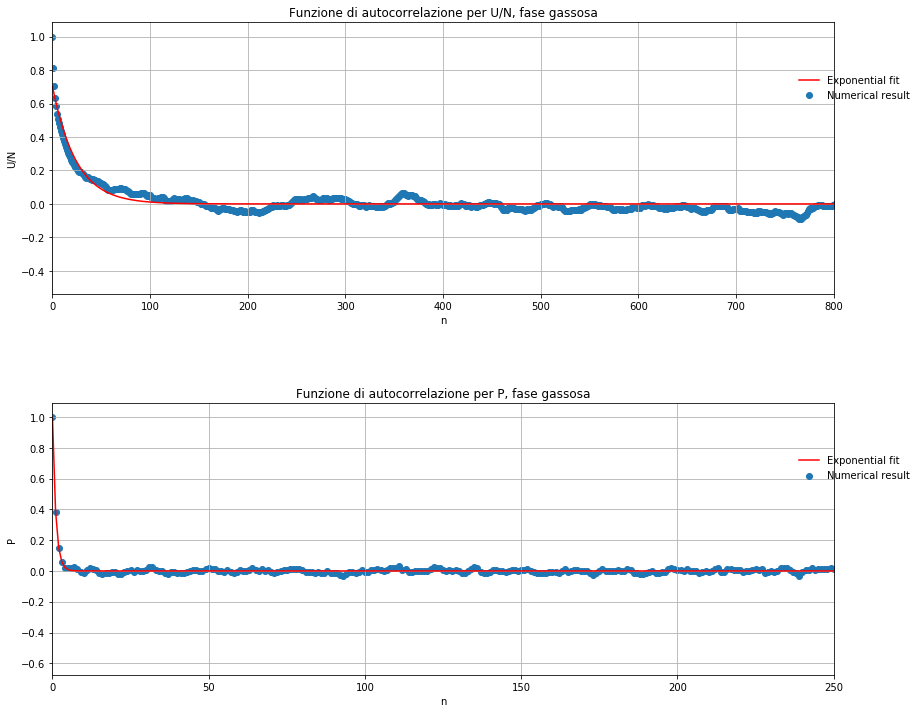

In [9]:
from scipy.optimize import curve_fit

def f(x,A,tau):  #funzione per il fit
    return A*np.exp(-(x/tau)) #esponenziale


fig = plt.figure(figsize=(14,12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
x=np.arange(Mx)
plt.subplot(2,1,1)
plt.title('Funzione di autocorrelazione per U/N, fase gassosa')
plt.xlabel('n')
plt.ylabel('U/N')
plt.scatter(x,Xu, label='Numerical result')
p_opt, p_cov = curve_fit(f, x, Xu, bounds=([0,0],[1,300]))
y_fit = f(x,p_opt[0],p_opt[1])
plt.plot(x,y_fit, color='r', label="Exponential fit") # plotting fitted function
print("optimized parameters [A,tau] =")
print(p_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))
plt.grid(True)
plt.legend(loc=(0.95, 0.7), frameon=False)
plt.xlim(0,800)

                  
plt.subplot(2,1,2)
plt.title('Funzione di autocorrelazione per P, fase gassosa')
plt.xlabel('n')
plt.ylabel('P')
plt.scatter(x,Xp, label='Numerical result')
p_opt, p_cov = curve_fit(f, x, Xp, bounds=([0,0],[100,300]))
y_fit = f(x,p_opt[0],p_opt[1])
plt.plot(x,y_fit, color='r', label="Exponential fit") # plotting fitted function
print("\n","Pressure:")
print("optimized parameters [A,tau] =")
print(p_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))
plt.legend(loc=(0.95, 0.7), frameon=False)
plt.grid(True)
plt.xlim(0,250)
plt.show()

### Statistical uncertaintes

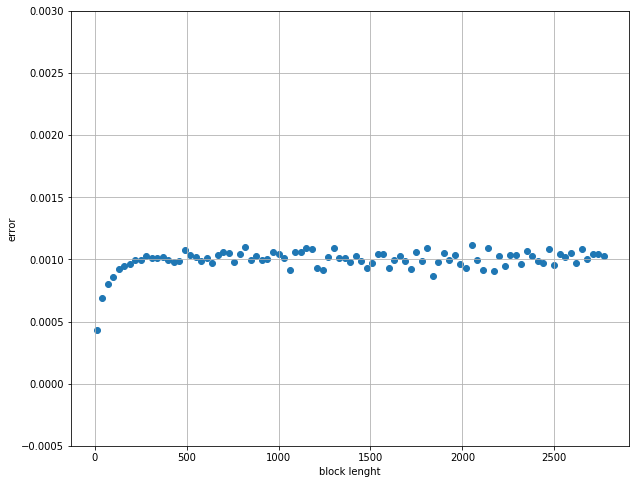

In [10]:
def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==1:
        return 0
    else:
        return math.sqrt((AV2/n - (AV/n)**2)/(n-1))
        
fig = plt.figure(figsize=(10,8))

start=10
stop=2800
st=30
p=(stop-start)/st
p=int(p)
errorp=np.zeros(p)
x=np.zeros(p)
indice=0
for L in range(start,stop,st):
    N=int(M/L) #Numero di blocchi
    ave = np.zeros(N)
    av2 = np.zeros(N)
    sum_prog=0.
    su2_prog=0. 
    for i in range(N):
        sum = 0
        for j in range(L):
            k = j+i*L
            sum += U[k]
        ave[i] = sum/L       # media di blocco
        av2[i] = (ave[i])**2 # media di blocco al quadrato
        sum_prog += ave[i]
        su2_prog +=av2[i]
    errorp[indice]=error(sum_prog,su2_prog,N)
    x[indice]=L
    indice+=1

plt.scatter(x,errorp)
plt.xlabel('block lenght')
plt.ylabel('error')
plt.ylim(-0.0005,0.003)
plt.grid(True)
plt.show()

### Exercise 07.2

I report the $g(r)$ calculation for the last block.

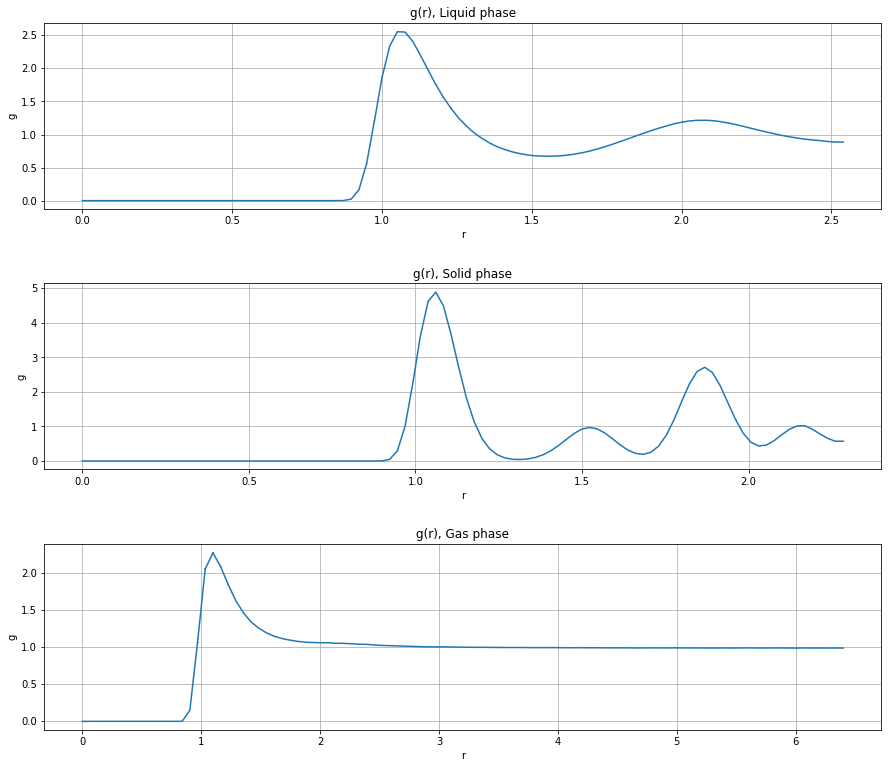

In [11]:
fig = plt.figure(figsize=(15,13))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(3,1,1)
plt.title('g(r), Liquid phase')
r, g, error=np.loadtxt("RisultatiNotebook/LJUnits/Liquido/Risultati/output.G.100", usecols=(0,1,2), delimiter='     ', unpack='true')
plt.xlabel('r')
plt.ylabel('g')
plt.errorbar(r,g, yerr=error)
plt.grid(True)
                
plt.subplot(3,1,2)
plt.title('g(r), Solid phase')
r, g, error=np.loadtxt("RisultatiNotebook/LJUnits/Solido/Risultati/output.G.100", usecols=(0,1,2), delimiter='     ', unpack='true')
plt.xlabel('r')
plt.ylabel('g')
plt.errorbar(r,g, yerr=error)
plt.grid(True)

plt.subplot(3,1,3)
plt.title('g(r), Gas phase')
r, g, error=np.loadtxt("RisultatiNotebook/LJUnits/Gas/Risultati/output.G.100", usecols=(0,1,2), delimiter='     ', unpack='true')
plt.xlabel('r')
plt.ylabel('g')
plt.errorbar(r,g, yerr=error)
plt.grid(True)
plt.show()

### Exercise 07.4

By means of your upgraded MC code, equilibrate and <span style="color:red">perform MC NVT simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) and Krypton ($\sigma = 0.364$ nm, $\epsilon/k_B = 164$ K, $m=83.798$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

<span style="color:red">show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in SI units ... and compare your MC results for the radial distribution function, $g(r)$, with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.</span>

### SI units: Argon and Kripton

NUMERICAL RESULT FOR THE GAS PHASE
Energia potenziale media dell'Argon: U/N= -49.7699 kB, incertezza= 0.124376 kB.
Energia potenziale media del Kripton: U/N= -68.0188 kB, incertezza= 0.169981 kB.
Pressione media dell'Argon: P= 20.3765 atm, incertezza= 0.0165087 atm
Pressione media del Kripton: P= 22.6947 atm, incertezza= 0.0183869 atm


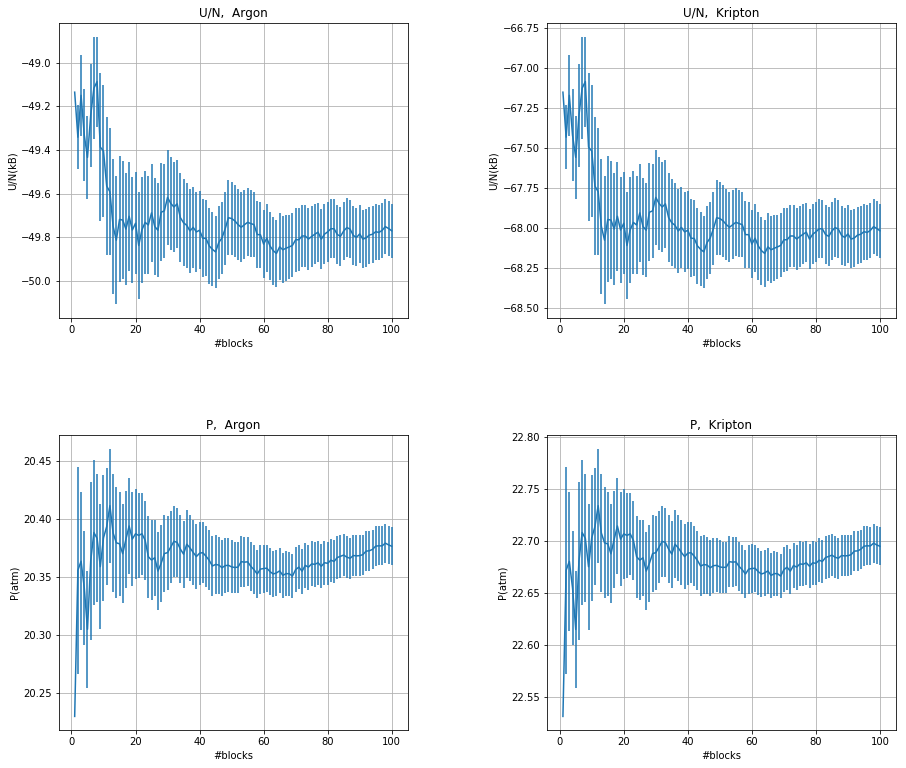

In [12]:
fig = plt.figure(figsize=(15,13))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

print("NUMERICAL RESULT FOR THE GAS PHASE")


plt.subplot(2,2,1)
plt.title('U/N,  Argon')
x, u, error=np.loadtxt("RisultatiNotebook/SIUnits/Gas/Argon/conversion.epot.0", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.xlabel('#blocks')
plt.ylabel('U/N(kB)')
plt.errorbar(x,u, yerr=error)
print("Energia potenziale media dell'Argon: U/N=",u[99],"kB, incertezza=",error[99],"kB.")
plt.grid(True)
plt.subplot(2,2,2)
plt.title('U/N,  Kripton')
x, u, error=np.loadtxt("RisultatiNotebook/SIUnits/Gas/Kripton/conversion.epot.0", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.xlabel('#blocks')
plt.ylabel('U/N(kB)')
plt.errorbar(x,u, yerr=error)
print("Energia potenziale media del Kripton: U/N=",u[99],"kB, incertezza=",error[99],"kB.")
plt.grid(True)

plt.subplot(2,2,3)
plt.title('P,  Argon')
x, u, error=np.loadtxt("RisultatiNotebook/SIUnits/Gas/Argon/conversion.pres.0", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.xlabel('#blocks')
plt.ylabel('P(atm)')
plt.errorbar(x,u, yerr=error)
print("Pressione media dell'Argon: P=", u[99],"atm, incertezza=", error[99],"atm")
plt.grid(True)

plt.subplot(2,2,4)
plt.title('P,  Kripton')
x, u, error=np.loadtxt("RisultatiNotebook/SIUnits/Gas/Kripton/conversion.pres.0", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.xlabel('#blocks')
plt.ylabel('P(atm)')
plt.errorbar(x,u, yerr=error)
print("Pressione media del Kripton: P=", u[99],"atm, incertezza=", error[99],"atm")
plt.grid(True)


plt.show()

NUMERICAL RESULT FOR THE LIQUID PHASE
Energia potenziale media dell'Argon: U/N= -656.028 kB, incertezza= 0.201632 kB.
Energia potenziale media del Kripton: U/N= -896.572 kB, incertezza= 0.275564 kB.
Pressione media dell'Argon: P= 575.897 atm, incertezza= 3.65435 atm
Pressione media del Kripton: P= 641.416 atm, incertezza= 4.0701 atm


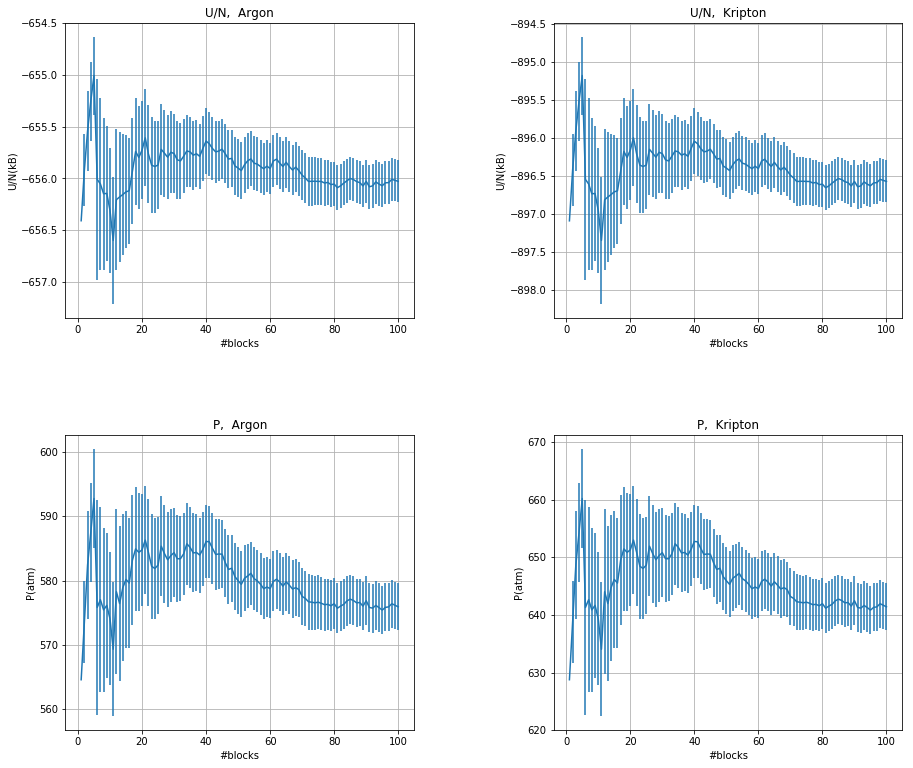

In [13]:
fig = plt.figure(figsize=(15,13))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

print("NUMERICAL RESULT FOR THE LIQUID PHASE")

plt.subplot(2,2,1)
plt.title('U/N,  Argon')
x, u, error=np.loadtxt("RisultatiNotebook/SIUnits/Liquid/Argon/conversion.epot.0", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.xlabel('#blocks')
plt.ylabel('U/N(kB)')
plt.errorbar(x,u, yerr=error)
print("Energia potenziale media dell'Argon: U/N=",u[99],"kB, incertezza=",error[99],"kB.")
plt.grid(True)
plt.subplot(2,2,2)
plt.title('U/N,  Kripton')
x, u, error=np.loadtxt("RisultatiNotebook/SIUnits/Liquid/Kripton/conversion.epot.0", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.xlabel('#blocks')
plt.ylabel('U/N(kB)')
plt.errorbar(x,u, yerr=error)
print("Energia potenziale media del Kripton: U/N=",u[99],"kB, incertezza=",error[99],"kB.")
plt.grid(True)

plt.subplot(2,2,3)
plt.title('P,  Argon')
x, u, error=np.loadtxt("RisultatiNotebook/SIUnits/Liquid/Argon/conversion.pres.0", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.xlabel('#blocks')
plt.ylabel('P(atm)')
plt.errorbar(x,u, yerr=error)
print("Pressione media dell'Argon: P=", u[99],"atm, incertezza=", error[99],"atm")
plt.grid(True)

plt.subplot(2,2,4)
plt.title('P,  Kripton')
x, u, error=np.loadtxt("RisultatiNotebook/SIUnits/Liquid/Kripton/conversion.pres.0", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.xlabel('#blocks')
plt.ylabel('P(atm)')
plt.errorbar(x,u, yerr=error)
print("Pressione media del Kripton: P=", u[99],"atm, incertezza=", error[99],"atm")
plt.grid(True)


plt.show()

NUMERICAL RESULT FOR THE SOLID PHASE
Energia potenziale media dell'Argon: U/N= -905.515 kB, incertezza= 0.153934 kB.
Energia potenziale media del Kripton: U/N= -1237.54 kB, incertezza= 0.210376 kB.
Pressione media del'l'Argon: P= 3160.52 atm, incertezza= 2.93133 atm
Pressione media del Kripton: P= 3520.08 atm, incertezza= 3.26482 atm


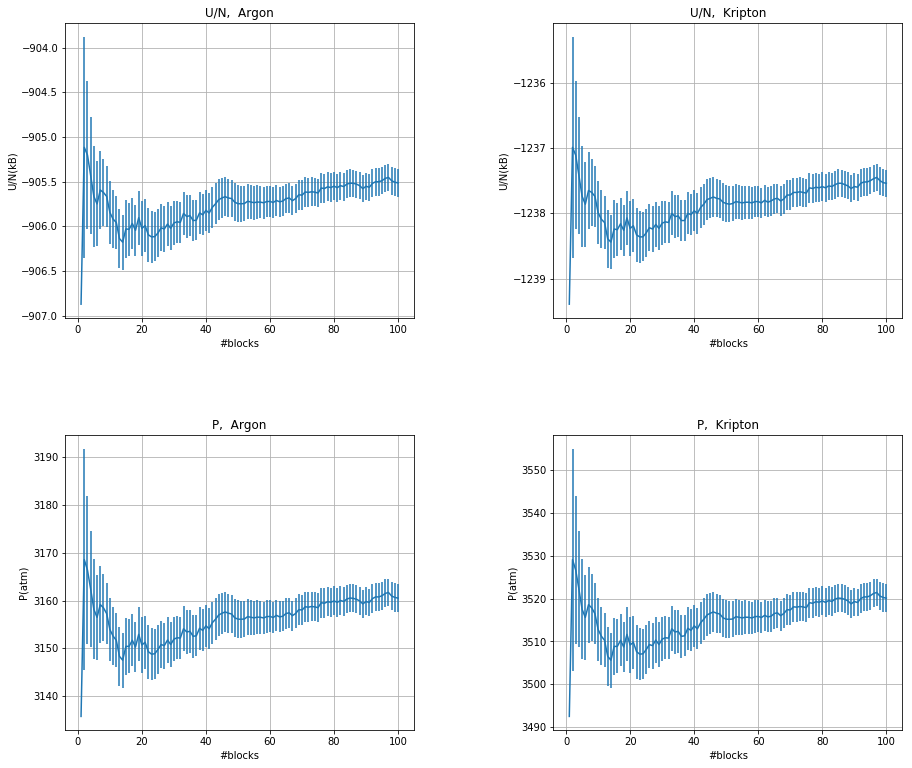

In [14]:
fig = plt.figure(figsize=(15,13))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

print("NUMERICAL RESULT FOR THE SOLID PHASE")

plt.subplot(2,2,1)
plt.title('U/N,  Argon')
x, u, error=np.loadtxt("RisultatiNotebook/SIUnits/Solid/Argon/conversion.epot.0", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.xlabel('#blocks')
plt.ylabel('U/N(kB)')
plt.errorbar(x,u, yerr=error)
print("Energia potenziale media dell'Argon: U/N=",u[99],"kB, incertezza=",error[99],"kB.")
plt.grid(True)
plt.subplot(2,2,2)
plt.title('U/N,  Kripton')
x, u, error=np.loadtxt("RisultatiNotebook/SIUnits/Solid/Kripton/conversion.epot.0", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.xlabel('#blocks')
plt.ylabel('U/N(kB)')
plt.errorbar(x,u, yerr=error)
print("Energia potenziale media del Kripton: U/N=",u[99],"kB, incertezza=",error[99],"kB.")
plt.grid(True)

plt.subplot(2,2,3)
plt.title('P,  Argon')
x, u, error=np.loadtxt("RisultatiNotebook/SIUnits/Solid/Argon/conversion.pres.0", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.xlabel('#blocks')
plt.ylabel('P(atm)')
plt.errorbar(x,u, yerr=error)
print("Pressione media del'l'Argon: P=", u[99],"atm, incertezza=", error[99],"atm")
plt.grid(True)

plt.subplot(2,2,4)
plt.title('P,  Kripton')
x, u, error=np.loadtxt("RisultatiNotebook/SIUnits/Solid/Kripton/conversion.pres.0", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.xlabel('#blocks')
plt.ylabel('P(atm)')
plt.errorbar(x,u, yerr=error)
print("Pressione media del Kripton: P=", u[99],"atm, incertezza=", error[99],"atm")
plt.grid(True)


plt.show()

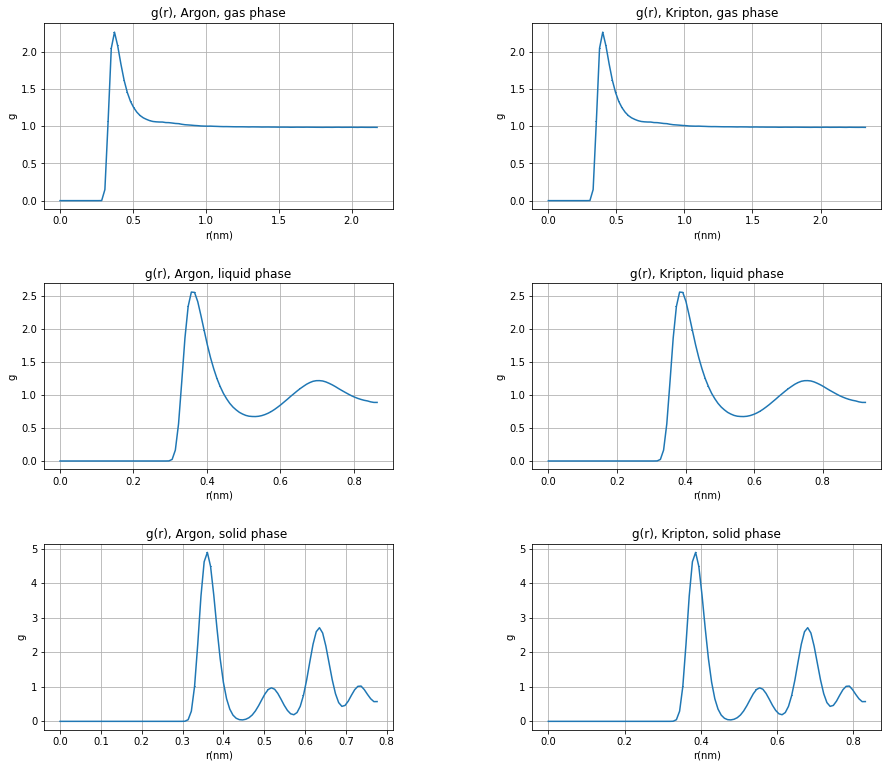

In [15]:
fig = plt.figure(figsize=(15,13))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(3,2,1)
r,g,error=np.loadtxt("RisultatiNotebook/SIUnits/Gas/Argon/conversion.G.100",usecols=(0,1,2), delimiter="   ", unpack='true')
plt.title('g(r), Argon, gas phase')
plt.xlabel('r(nm)')
plt.ylabel('g')
plt.errorbar(r,g, yerr=error)
plt.grid(True)

plt.subplot(3,2,2)
r,g,error=np.loadtxt("RisultatiNotebook/SIUnits/Gas/Kripton/conversion.G.100",usecols=(0,1,2), delimiter="   ", unpack='true')
plt.title('g(r), Kripton, gas phase')
plt.xlabel('r(nm)')
plt.ylabel('g')
plt.errorbar(r,g, yerr=error)
plt.grid(True)

plt.subplot(3,2,3)
r,g,error=np.loadtxt("RisultatiNotebook/SIUnits/Liquid/Argon/conversion.G.100",usecols=(0,1,2), delimiter="   ", unpack='true')
plt.title('g(r), Argon, liquid phase')
plt.xlabel('r(nm)')
plt.ylabel('g')
plt.errorbar(r,g, yerr=error)
plt.grid(True)

plt.subplot(3,2,4)
r,g,error=np.loadtxt("RisultatiNotebook/SIUnits/Liquid/Kripton/conversion.G.100",usecols=(0,1,2), delimiter="   ", unpack='true')
plt.title('g(r), Kripton, liquid phase')
plt.xlabel('r(nm)')
plt.ylabel('g')
plt.errorbar(r,g, yerr=error)
plt.grid(True)

plt.subplot(3,2,5)
r,g,error=np.loadtxt("RisultatiNotebook/SIUnits/Solid/Argon/conversion.G.100",usecols=(0,1,2), delimiter="   ", unpack='true')
plt.title('g(r), Argon, solid phase ')
plt.xlabel('r(nm)')
plt.ylabel('g')
plt.errorbar(r,g, yerr=error)
plt.grid(True)

plt.subplot(3,2,6)
r,g,error=np.loadtxt("RisultatiNotebook/SIUnits/Solid/Kripton/conversion.G.100",usecols=(0,1,2), delimiter="   ", unpack='true')
plt.title('g(r), Kripton, solid phase')
plt.xlabel('r(nm)')
plt.ylabel('g')
plt.errorbar(r,g, yerr=error)
plt.grid(True)
plt.show()